In [17]:
import pandas as pd
import numpy as np
import os

In [18]:
os.chdir(r'C:\SML_Projects\SML_CVE_type_cwe_predict')

In [19]:
df = pd.read_csv("data/engineered/engineered_dataset.csv")

In [20]:
df = df.sample(frac=0.1, random_state=42).reset_index(drop=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cve_id                      10296 non-null  object 
 1   description                 10296 non-null  object 
 2   cvss_score                  10296 non-null  object 
 3   cwe                         10296 non-null  object 
 4   vendor                      10296 non-null  object 
 5   product                     10296 non-null  object 
 6   publish_date                10296 non-null  object 
 7   type                        10296 non-null  object 
 8   vendor_freq                 10296 non-null  float64
 9   product_freq                10296 non-null  float64
 10  desc_len                    10296 non-null  int64  
 11  desc_word_count             10296 non-null  int64  
 12  desc_num_count              10296 non-null  int64  
 13  desc_upper_ratio            102

# Shap value

In [22]:
import pandas as pd
import numpy as np

In [23]:
from sklearn.preprocessing import OrdinalEncoder

df_copy = df.copy()

X = df_copy.drop(columns=['type', 'cvss_score'], errors='ignore')
y = df_copy[['type', 'cvss_score']]  

In [24]:
cat_cols = X.select_dtypes(exclude=[np.number]).columns
enc = OrdinalEncoder()
X[cat_cols] = enc.fit_transform(X[cat_cols])

feature_names = X.columns.tolist()

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

x_test = X_test

In [26]:
from joblib import load

model = load(r'C:\SML_Projects\SML_CVE_type_cwe_predict\pipeline\final_pipeline.joblib')

# SHAP

In [27]:
for i, target in enumerate(['type', 'cvss_score']):
    clf = model.estimators_[i]
    print(f"\nFeature importances for target: {target}")
    for name, imp in zip(feature_names, clf.feature_importances_):
        print(f"{name:20s} = {imp:.5f}")


Feature importances for target: type
cve_id               = 0.00266
description          = 0.02363
cwe                  = 0.14090
vendor               = 0.00180
product              = 0.00159
publish_date         = 0.00224
vendor_freq          = 0.02371
product_freq         = 0.01957
desc_len             = 0.00413
desc_word_count      = 0.00368
desc_num_count       = 0.00554
desc_upper_ratio     = 0.00516
desc_exclamation     = 0.00008
desc_question        = 0.00026
vendor_product_interaction = 0.03292
XSS_score            = 0.29150
SQLi_score           = 0.18537
RCE_score            = 0.08732
DoS_score            = 0.07324
CSRF_score           = 0.03261
AuthBypass_score     = 0.00668
PrivEsc_score        = 0.00667
PathTraversal_score  = 0.03095
SSRF_score           = 0.00147
InfoDisclosure_score = 0.00568
Other_score          = 0.00013
cvss_keywords_score  = 0.01053

Feature importances for target: cvss_score
cve_id               = 0.01266
description          = 0.06220
cwe          


Waterfall plot for target: type, sample 0


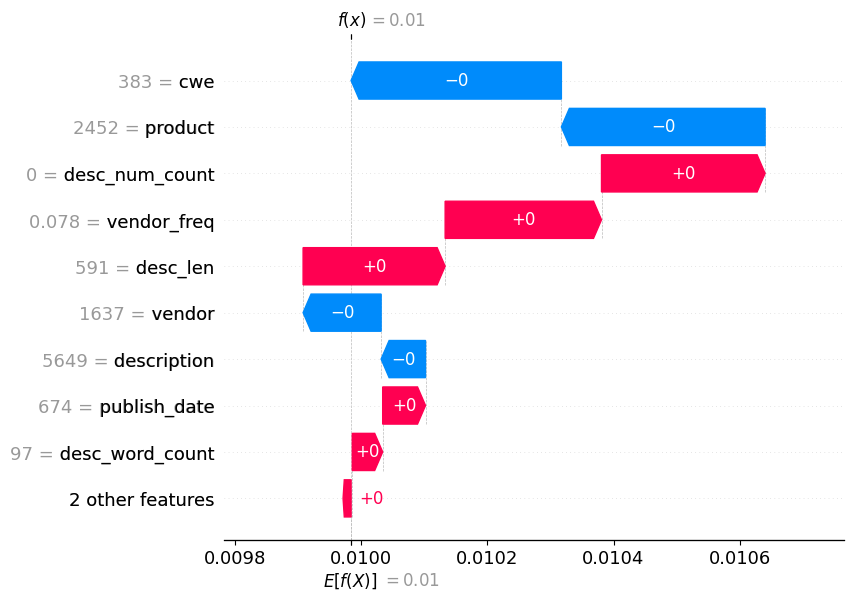


Waterfall plot for target: cvss_score, sample 0


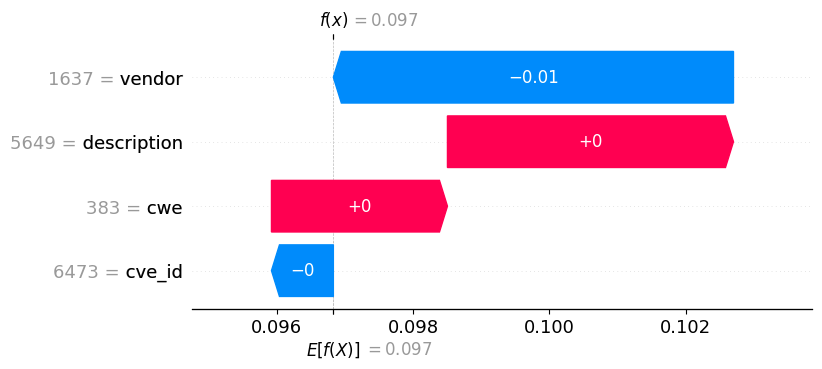

In [28]:
import shap

sample_ind = 0

targets = ['type', 'cvss_score']

for i, target in enumerate(targets):
    clf = model.estimators_[i]
    explainer = shap.TreeExplainer(clf)
    shap_values_all = explainer.shap_values(x_test)

    shap_vals_sample = shap_values_all[0][sample_ind]
    base_val = explainer.expected_value[0]

    print(f"\nWaterfall plot for target: {target}, sample {sample_ind}")
    shap.plots.waterfall(
        shap.Explanation(
            values=shap_vals_sample,
            base_values=base_val,
            data=x_test.iloc[sample_ind],
            feature_names=feature_names
        )
    )

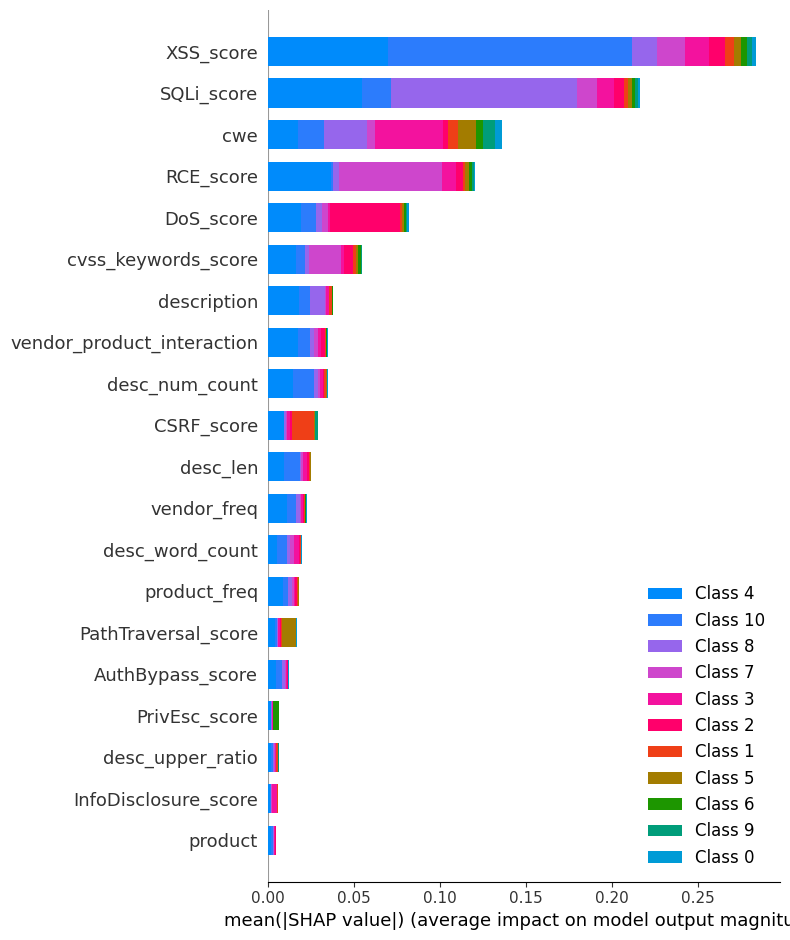

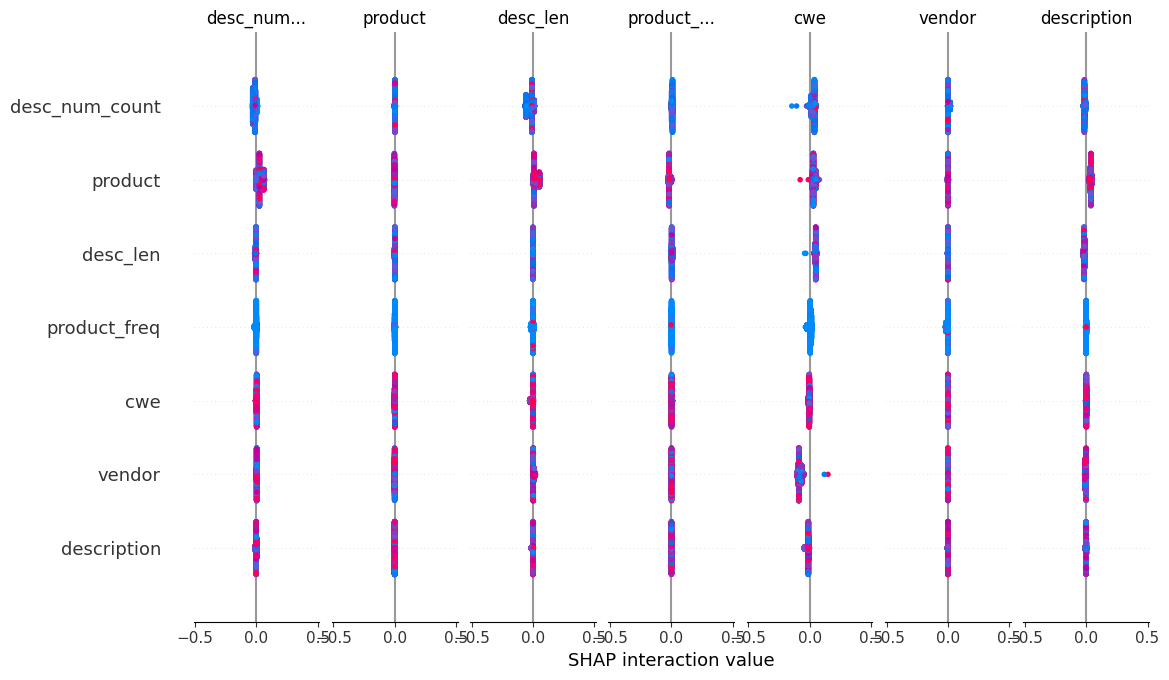

In [29]:
i = 0
clf = model.estimators_[i]
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values, x_test, feature_names=feature_names, plot_type="bar")   
shap.summary_plot(shap_values, x_test, feature_names=feature_names) 

In [30]:
print("\nFeature importances:\n")
clf = model.estimators_[0]
for name, importance in zip(X.columns, clf.feature_importances_):
    print(f"{name:20s} = {importance:.5f}")


Feature importances:

cve_id               = 0.00266
description          = 0.02363
cwe                  = 0.14090
vendor               = 0.00180
product              = 0.00159
publish_date         = 0.00224
vendor_freq          = 0.02371
product_freq         = 0.01957
desc_len             = 0.00413
desc_word_count      = 0.00368
desc_num_count       = 0.00554
desc_upper_ratio     = 0.00516
desc_exclamation     = 0.00008
desc_question        = 0.00026
vendor_product_interaction = 0.03292
XSS_score            = 0.29150
SQLi_score           = 0.18537
RCE_score            = 0.08732
DoS_score            = 0.07324
CSRF_score           = 0.03261
AuthBypass_score     = 0.00668
PrivEsc_score        = 0.00667
PathTraversal_score  = 0.03095
SSRF_score           = 0.00147
InfoDisclosure_score = 0.00568
Other_score          = 0.00013
cvss_keywords_score  = 0.01053
